In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
model_history = model.fit(X_train, y_train, epochs=30,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 20s 23ms/step - loss: 0.8767 - accuracy: 0.6992 - val_loss: 0.7489 - val_accuracy: 0.7368
Epoch 2/30
860/860 [==============================] - 19s 23ms/step - loss: 0.5386 - accuracy: 0.8051 - val_loss: 0.4915 - val_accuracy: 0.8186
Epoch 3/30
860/860 [==============================] - 19s 23ms/step - loss: 0.4805 - accuracy: 0.8259 - val_loss: 0.9241 - val_accuracy: 0.7080
Epoch 4/30
860/860 [==============================] - 20s 23ms/step - loss: 0.4432 - accuracy: 0.8421 - val_loss: 0.4148 - val_accuracy: 0.8562
Epoch 5/30
860/860 [==============================] - 20s 24ms/step - loss: 0.4192 - accuracy: 0.8504 - val_loss: 0.4368 - val_accuracy: 0.8466
Epoch 6/30
860/860 [==============================] - 20s 23ms/step - loss: 0.3953 - accuracy: 0.8587 - val_loss: 0.3770 - val_accuracy: 0.8698
Epoch 7/30
860/860 [==============================] - 20s 24ms/step - loss: 0.3776 - accuracy: 0.8656 - val_loss: 0.4044 - val_accuracy:

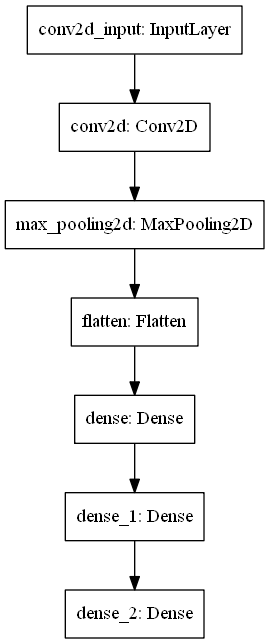

In [14]:
keras.utils.plot_model(model)

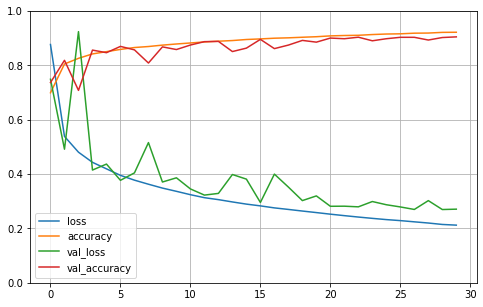

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2821 - accuracy: 0.8997


In [17]:
ev

[0.2820536494255066, 0.8996999859809875]

In [18]:
X_new = X_test[:3]

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\medin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [20]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [22]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


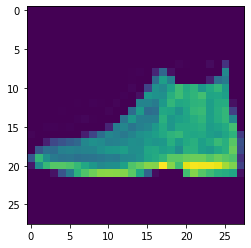

In [23]:
print(plt.imshow(X_test[0].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


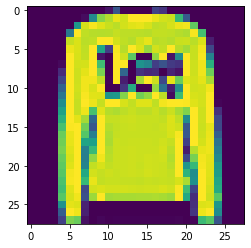

In [24]:
print(plt.imshow(X_test[1].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


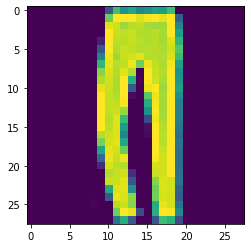

In [25]:
print(plt.imshow(X_test[2].reshape((28,28))))